<a href="https://colab.research.google.com/github/xasham/pp-cnn-classificationWithDogImage/blob/main/PP_Klasifikasi_dataset_ras_anjing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip 80dataset.zip

Archive:  80dataset.zip
   creating: dataset/
   creating: dataset/Beagle/
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  i

In [ ]:
import numpy as np
import anvil.server
import tensorflow as tf
import random
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os
from IPython.display import display, clear_output
import io
import warnings

warnings.filterwarnings("ignore")

In [ ]:
path = "/content/dataset"

augmentasi

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Generator untuk data training
train_generator = train_datagen.flow_from_directory(
    "/content/dataset",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generator untuk data validasi
val_generator = train_datagen.flow_from_directory(
    "/content/dataset",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 619 images belonging to 10 classes.
Found 153 images belonging to 10 classes.


resize

In [ ]:
def get_features_dog(folder,size=(150, 150)):
    images = []
    labels = []
    for dog_name in os.listdir(folder):
        dog_class = os.path.join(folder, dog_name)
        for img_name in os.listdir(dog_class):
            img_path = os.path.join(dog_class, img_name)
            img = Image.open(img_path)
            img = img.resize(size)
            img = np.array(img)
            images.append(img)
            labels.append(dog_name)

    return np.array(images), np.array(labels)

normalization

In [ ]:
X, y = get_features_dog(path)

y = y.reshape(-1, 1)
X = X / 255.0

enc = OneHotEncoder()
y = enc.fit_transform(y).toarray()

cnn model

In [ ]:
model = keras.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(enc.categories_[0]), activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

optimizer

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

traintest split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

training model

In [ ]:
history = model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=32, validation_data=[x_test, y_test])

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1061 - loss: 2.8192 - val_accuracy: 0.1032 - val_loss: 2.2613
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2272 - loss: 2.1581 - val_accuracy: 0.4516 - val_loss: 1.7086
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.4912 - loss: 1.6090 - val_accuracy: 0.7613 - val_loss: 0.9149
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7469 - loss: 0.7981 - val_accuracy: 0.8903 - val_loss: 0.4167
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9177 - loss: 0.2689 - val_accuracy: 0.9484 - val_loss: 0.2282
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9666 - loss: 0.1273 - val_accuracy: 0.9677 - val_loss: 0.1168
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9734 - loss: 0.1046 - val_accuracy: 0.9935 - val_loss: 0.0799
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9758 - loss: 0.0877 - val_accuracy: 0.9871 - val_loss:

accuracy plot

1	0.1216		0.1032
2	0.2885		0.4516
3	0.5446		0.7613
4	0.7942		0.8903
5	0.9303		0.9484
6	0.9643		0.9677
7	0.9676		0.9935
8	0.9822		0.9871
9	0.9951		0.9935
10	0.9984		0.9871


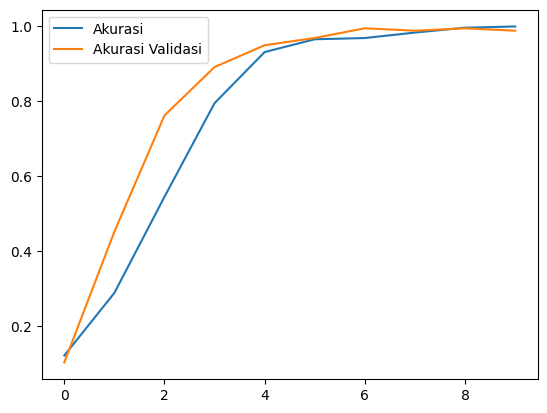

In [ ]:
plt.plot(history.history["accuracy"], label="Akurasi")
plt.plot(history.history["val_accuracy"], label="Akurasi Validasi")
plt.legend()
output_lines = []
output_lines.append("Epoch\tAkurasi\t\tAkurasi Validasi")

for i, (acc, val_acc) in enumerate(zip(history.history["accuracy"], history.history["val_accuracy"])):
    line = f"{i+1}\t{acc:.4f}\t\t{val_acc:.4f}"
    print(line)
    output_lines.append(line)


loss plot

1	2.5208		2.2613
2	2.0709		1.7086
3	1.4481		0.9149
4	0.6574		0.4167
5	0.2479		0.2282
6	0.1278		0.1168
7	0.1174		0.0799
8	0.0822		0.0756
9	0.0424		0.0385
10	0.0151		0.0258


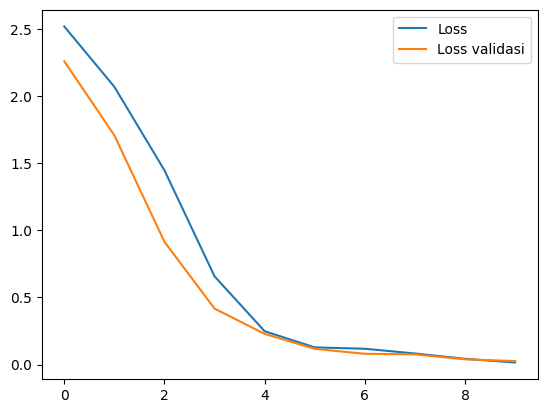

In [ ]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Loss validasi")
plt.legend()
output_lines = []
output_lines.append("Epoch\tAkurasi\t\tAkurasi Validasi")

for i, (loss, val_loss) in enumerate(zip(history.history["loss"], history.history["val_loss"])):
    line = f"{i+1}\t{loss:.4f}\t\t{val_loss:.4f}"
    print(line)
    output_lines.append(line)

learning curve

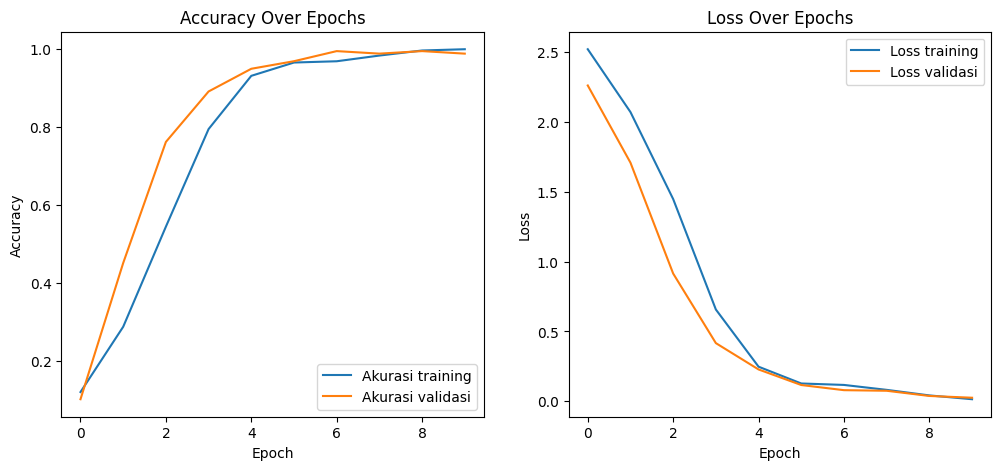

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi training')
plt.plot(history.history['val_accuracy'], label='Akurasi validasi')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss training')
plt.plot(history.history['val_loss'], label='Loss validasi')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

confusion matrix, precision, recall, f1-score

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step


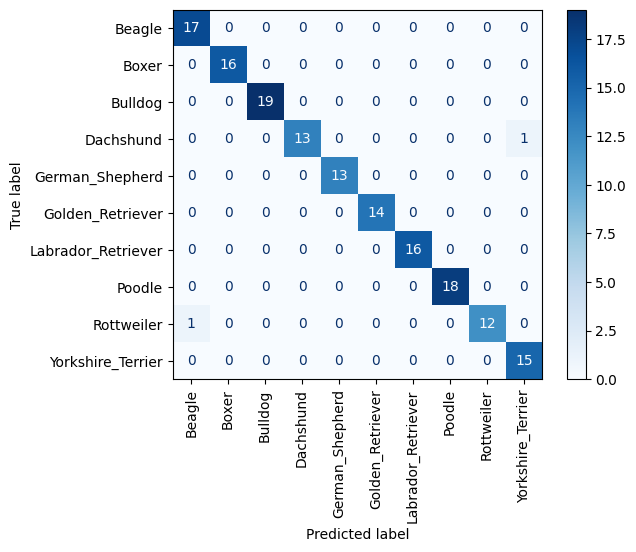

                    precision    recall  f1-score   support

            Beagle       0.94      1.00      0.97        17
             Boxer       1.00      1.00      1.00        16
           Bulldog       1.00      1.00      1.00        19
         Dachshund       1.00      0.93      0.96        14
   German_Shepherd       1.00      1.00      1.00        13
  Golden_Retriever       1.00      1.00      1.00        14
Labrador_Retriever       1.00      1.00      1.00        16
            Poodle       1.00      1.00      1.00        18
        Rottweiler       1.00      0.92      0.96        13
 Yorkshire_Terrier       0.94      1.00      0.97        15

          accuracy                           0.99       155
         macro avg       0.99      0.99      0.99       155
      weighted avg       0.99      0.99      0.99       155



In [ ]:
def get_confusion_matrix(x_test,y_test):
    pred_y = model.predict(x_test)
    y_true = np.argmax(y_test, axis=1)
    y_pred_classes = np.argmax(pred_y, axis=1)
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=enc.categories_[0])
    disp.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=90)
    plt.show()
    labels_str = enc.categories_[0]
    print(classification_report(y_true, y_pred_classes, target_names=labels_str))
get_confusion_matrix(x_test,y_test)

predict or real

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


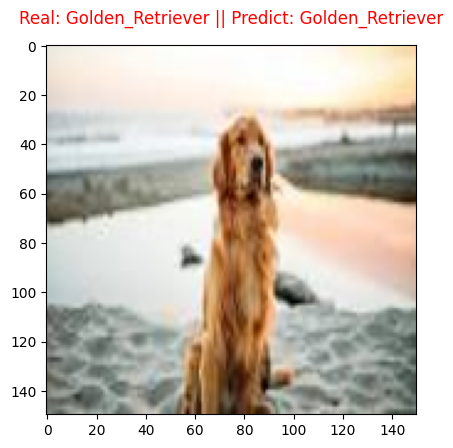

In [ ]:
def get_random_dog():
    images = x_test
    labels = y_test

    id = random.randint(0, len(images) - 1)

    prediction = model.predict(images[id].reshape(1, 150, 150, 3)).tolist()

    plt.imshow(images[id])
    plt.title(f"Real: {enc.inverse_transform(labels[id].reshape(1, -1))[0][0]} || Predict: {enc.inverse_transform(prediction)[0][0]}",color="red",pad=15)
    plt.show()

get_random_dog()

save model

In [ ]:
model.save('cnn_model.h5')

load model

In [ ]:

model = load_model('cnn_model.h5')
class_names = ['beagle', 'boxer', 'bulldog', 'dachshund', 'german_shepherd', 'golden_retriever', 'labrador_retriever', 'poodle', 'rottweiler', 'yorkshire_terrier']

setup anvil works

In [ ]:
!pip install anvil-uplink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.5 MB/s eta 0:00:00


connect to server

In [ ]:
anvil.server.connect("server_HTNZR2M5XNQFX3AWOQSXFNKJ-TV5W7525AZ6WUMJZ")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


tangkap data dari anvil

In [ ]:
@anvil.server.callable
def klasifikasi_gambar(file):
    # Ambil gambar dari file (yang dikirim dari Anvil)
    img_bytes = file.get_bytes()
    img = Image.open(io.BytesIO(img_bytes)).resize((150, 150))  # sesuaikan dengan input model

    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)   # normalisasi & batch dimension

    pred = model.predict(img_array)
    pred_label = class_names[np.argmax(pred)]


    label_asli = file.name.split("_")[0]

    return {
        'prediksi': pred_label,
        'label_asli': label_asli
    }


selalu connect ke server

In [ ]:
anvil.server.wait_forever()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


KeyboardInterrupt: 